In [22]:
%matplotlib notebook
%matplotlib inline

In [23]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy.stats import shapiro

In [24]:
# Read CSV
csvpath = "output_data/census.csv"
census_df = pd.read_csv(csvpath,index_col="datapoint")
census_df["Zipcode"] = census_df["Zipcode"].astype("category")
census_df

,Year,Zipcode,Total Population,White Population,Black Population,Employed Count,Unemployed Count,Poverty Count,Poverty Count - White,Poverty Count - Black,Median Income,Median Rent,Median Home Value,County,Adjusted Median Income,Adjusted Median Rent,Adjusted Median Home Value
datapoint,,,,,,,,,,,,,,,,,
0,2012,48009,20153,18622,663,10031.0,489.0,797.0,767.0,0.0,100789.0,993.0,339600.0,Oakland,128472.019282,1265.740459,432875.589083
1,2013,48009,20241,18620,765,10138.0,553.0,704.0,669.0,0.0,98750.0,1070.0,347400.0,Oakland,124055.861168,1344.200217,436425.378933
2,2015,48009,20489,18864,587,10669.0,407.0,827.0,730.0,37.0,108135.0,1121.0,410700.0,Oakland,133518.897062,1384.146517,507108.808651
3,2017,48009,20836,19063,580,10795.0,393.0,914.0,726.0,92.0,114537.0,1223.0,467700.0,Oakland,136748.636321,1460.170794,558398.920937
4,2020,48009,21277,19011,688,10729.0,362.0,1001.0,790.0,114.0,126646.0,1498.0,538500.0,Oakland,143207.147803,1693.889325,608918.158424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,2017,49548,32694,23495,3522,16310.0,963.0,6656.0,4210.0,932.0,45534.0,695.0,82200.0,Kent,54364.200269,829.778170,98140.669876
1246,2012,49548,30155,23134,3109,13743.0,1895.0,6416.0,4296.0,1162.0,39926.0,622.0,89700.0,Kent,50892.198969,792.840449,114337.280155
1247,2015,49548,30234,22081,3032,14715.0,1308.0,6056.0,3203.0,996.0,40895.0,648.0,78800.0,Kent,50494.800900,800.113241,97297.721261


In [25]:
# Create column in DF for ratios of White/Black population and poverty counts AND employed / unemployed
for i in census_df.index:
    census_df.at[i,"% Black Population"] = 100*(census_df.at[i,"Black Population"] / census_df.at[i,"Total Population"])
    census_df.at[i,"% White Population"] = 100*(census_df.at[i,"White Population"] / census_df.at[i,"Total Population"])
    census_df.at[i,"% Unemployed"]       = 100*(census_df.at[i,"Unemployed Count"] / census_df.at[i,"Total Population"])
    census_df.at[i, "% Black Poverty"]   = 100*(census_df.at[i,"Poverty Count - Black"] / census_df.at[i,"Poverty Count"])
    census_df.at[i, "% White Poverty"]   = 100*(census_df.at[i,"Poverty Count - White"] / census_df.at[i,"Poverty Count"])
census_df

,Year,Zipcode,Total Population,White Population,Black Population,Employed Count,Unemployed Count,Poverty Count,Poverty Count - White,Poverty Count - Black,...,Median Home Value,County,Adjusted Median Income,Adjusted Median Rent,Adjusted Median Home Value,% Black Population,% White Population,% Unemployed,% Black Poverty,% White Poverty
datapoint,,,,,,,,,,,,,,,,,,,,,
0,2012,48009,20153,18622,663,10031.0,489.0,797.0,767.0,0.0,...,339600.0,Oakland,128472.019282,1265.740459,432875.589083,3.289833,92.403116,2.426438,0.000000,96.235885
1,2013,48009,20241,18620,765,10138.0,553.0,704.0,669.0,0.0,...,347400.0,Oakland,124055.861168,1344.200217,436425.378933,3.779458,91.991502,2.732078,0.000000,95.028409
2,2015,48009,20489,18864,587,10669.0,407.0,827.0,730.0,37.0,...,410700.0,Oakland,133518.897062,1384.146517,507108.808651,2.864952,92.068915,1.986432,4.474002,88.270859
3,2017,48009,20836,19063,580,10795.0,393.0,914.0,726.0,92.0,...,467700.0,Oakland,136748.636321,1460.170794,558398.920937,2.783644,91.490689,1.886159,10.065646,79.431072
4,2020,48009,21277,19011,688,10729.0,362.0,1001.0,790.0,114.0,...,538500.0,Oakland,143207.147803,1693.889325,608918.158424,3.233539,89.350002,1.701368,11.388611,78.921079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,2017,49548,32694,23495,3522,16310.0,963.0,6656.0,4210.0,932.0,...,82200.0,Kent,54364.200269,829.778170,98140.669876,10.772619,71.863339,2.945495,14.002404,63.251202
1246,2012,49548,30155,23134,3109,13743.0,1895.0,6416.0,4296.0,1162.0,...,89700.0,Kent,50892.198969,792.840449,114337.280155,10.310065,76.716962,6.284198,18.110973,66.957606
1247,2015,49548,30234,22081,3032,14715.0,1308.0,6056.0,3203.0,996.0,...,78800.0,Kent,50494.800900,800.113241,97297.721261,10.028445,73.033671,4.326255,16.446499,52.889696


In [34]:
# Create separate DFs for each county
oakland_data = pd.DataFrame(census_df.loc[census_df["County"] == "Oakland"])
kent_data = pd.DataFrame(census_df.loc[census_df["County"] == "Kent"])
saginaw_data = pd.DataFrame(census_df.loc[census_df["County"] == "Saginaw"])

# Ensure zipcodes are categorical
oakland_data["Zipcode"] = oakland_data["Zipcode"].astype("object")
kent_data["Zipcode"] = kent_data["Zipcode"].astype("object")
saginaw_data["Zipcode"] = saginaw_data["Zipcode"].astype("object")

# Export separate dataframes for use in Map Plots ipynb 
oakland_data.to_csv("output_data/oakland_data.csv",index_label="datapoint")
kent_data.to_csv("output_data/kent_data.csv",index_label="datapoint")
saginaw_data.to_csv("output_data/saginaw_data.csv",index_label="datapoint")

In [35]:
# Create dataframes grouped by zipcode for zipcode analysis
oakland_grouped = oakland_data.groupby("Zipcode").median()
kent_grouped = kent_data.groupby("Zipcode").median()
saginaw_grouped = saginaw_data.groupby("Zipcode").median()

In [36]:
# Determine if any of the datasets are normally distributed
oakland_shapiro_df = pd.DataFrame({"Total Population": [shapiro(oakland_data["Total Population"])],
                                   "Adjusted Median Income": [shapiro(oakland_data["Adjusted Median Income"])] ,
                                   "Adjusted Median Rent": [shapiro(oakland_data["Adjusted Median Rent"])] ,
                                   "Adjusted Median Home Value": [shapiro(oakland_data["Adjusted Median Home Value"])] ,
                                   "% Black Population": [shapiro(oakland_data["% Black Population"])] ,
                                   "% White Population": [shapiro(oakland_data["% White Population"])] ,
                                   "% Unemployed": [shapiro(oakland_data["% Unemployed"])] , 
                                   "% Black Poverty":  [shapiro(oakland_data["% Black Poverty"])],
                                   "% White Poverty": [shapiro(oakland_data["% White Poverty"])]
                                  })
oakland_shapiro_df

## None of the p values (second number) are over .05, so the data does not come from a normal distribution

,Total Population,Adjusted Median Income,Adjusted Median Rent,Adjusted Median Home Value,% Black Population,% White Population,% Unemployed,% Black Poverty,% White Poverty
0,"(0.9829899072647095, 6.007644515193533e-07)","(0.9850981831550598, 2.9024276955169626e-06)","(0.9205539226531982, 3.780136817209144e-18)","(0.9804571866989136, 1.0337661393577946e-07)","(0.6024346351623535, 2.734817489597544e-36)","(0.798740565776825, 8.18224692414609e-28)","(0.9170214533805847, 1.493541184003802e-18)","(0.7495205402374268, 2.0794583463221448e-30)","(0.8959997296333313, 1.0083114370551899e-20)"


In [42]:
# Determine if any of the datasets are normally distributed
saginaw_shapiro_df = pd.DataFrame({"Total Population": [shapiro(saginaw_data["Total Population"])],
                                   "Adjusted Median Income": [shapiro(saginaw_data["Adjusted Median Income"])] ,
                                   "Adjusted Median Rent": [shapiro(saginaw_data["Adjusted Median Rent"])] ,
                                   "Adjusted Median Home Value": [shapiro(saginaw_data["Adjusted Median Home Value"])] ,
                                   "% Black Population": [shapiro(saginaw_data["% Black Population"])] ,
                                   "% White Population": [shapiro(saginaw_data["% White Population"])] ,
                                   "% Unemployed": [shapiro(saginaw_data["% Unemployed"])] , 
                                   "% Black Poverty":  [shapiro(saginaw_data["% Black Poverty"])],
                                   "% White Poverty": [shapiro(saginaw_data["% White Poverty"])]
                                  })
saginaw_shapiro_df
## None of the p values (second number) are over .05, so the data does not come from a normal distribution

,Total Population,Adjusted Median Income,Adjusted Median Rent,Adjusted Median Home Value,% Black Population,% White Population,% Unemployed,% Black Poverty,% White Poverty
0,"(0.78984135389328, 1.2240926415747573e-17)","(0.9703394770622253, 4.526455086306669e-05)","(0.9724913239479065, 9.221657091984525e-05)","(0.9772344827651978, 0.00048494848306290805)","(0.5146529674530029, 1.0299066609047832e-25)","(0.5821046829223633, 3.7675732564952275e-24)","(0.9574605226516724, 9.987438716052566e-07)","(0.6399199962615967, 1.2021384439258236e-22)","(0.7496739625930786, 3.428189302649789e-19)"


In [43]:
# Determine if any of the datasets are normally distributed
kent_shapiro_df = pd.DataFrame({"Total Population": [shapiro(kent_data["Total Population"])],
                                   "Adjusted Median Income": [shapiro(kent_data["Adjusted Median Income"])] ,
                                   "Adjusted Median Rent": [shapiro(kent_data["Adjusted Median Rent"])] ,
                                   "Adjusted Median Home Value": [shapiro(kent_data["Adjusted Median Home Value"])] ,
                                   "% Black Population": [shapiro(kent_data["% Black Population"])] ,
                                   "% White Population": [shapiro(kent_data["% White Population"])] ,
                                   "% Unemployed": [shapiro(kent_data["% Unemployed"])] , 
                                   "% Black Poverty":  [shapiro(kent_data["% Black Poverty"])],
                                   "% White Poverty": [shapiro(kent_data["% White Poverty"])]
                                  })
kent_shapiro_df
## None of the p values (second number) are over .05, so the data does not come from a normal distribution

,Total Population,Adjusted Median Income,Adjusted Median Rent,Adjusted Median Home Value,% Black Population,% White Population,% Unemployed,% Black Poverty,% White Poverty
0,"(0.9562539458274841, 5.295288119100405e-08)","(0.8821704983711243, 1.0383693891161637e-14)","(0.8965504765510559, 1.0696739988994702e-13)","(0.924335777759552, 1.99523297189641e-11)","(0.727453351020813, 3.379025986520897e-22)","(0.8154786229133606, 1.6551756878166904e-18)","(0.9685501456260681, 2.8070242024114123e-06)","(0.8226539492607117, 3.748488886972865e-18)","(0.919919490814209, 8.040207388759768e-12)"


# Income in Each County, by Zipcode **Jonathan**

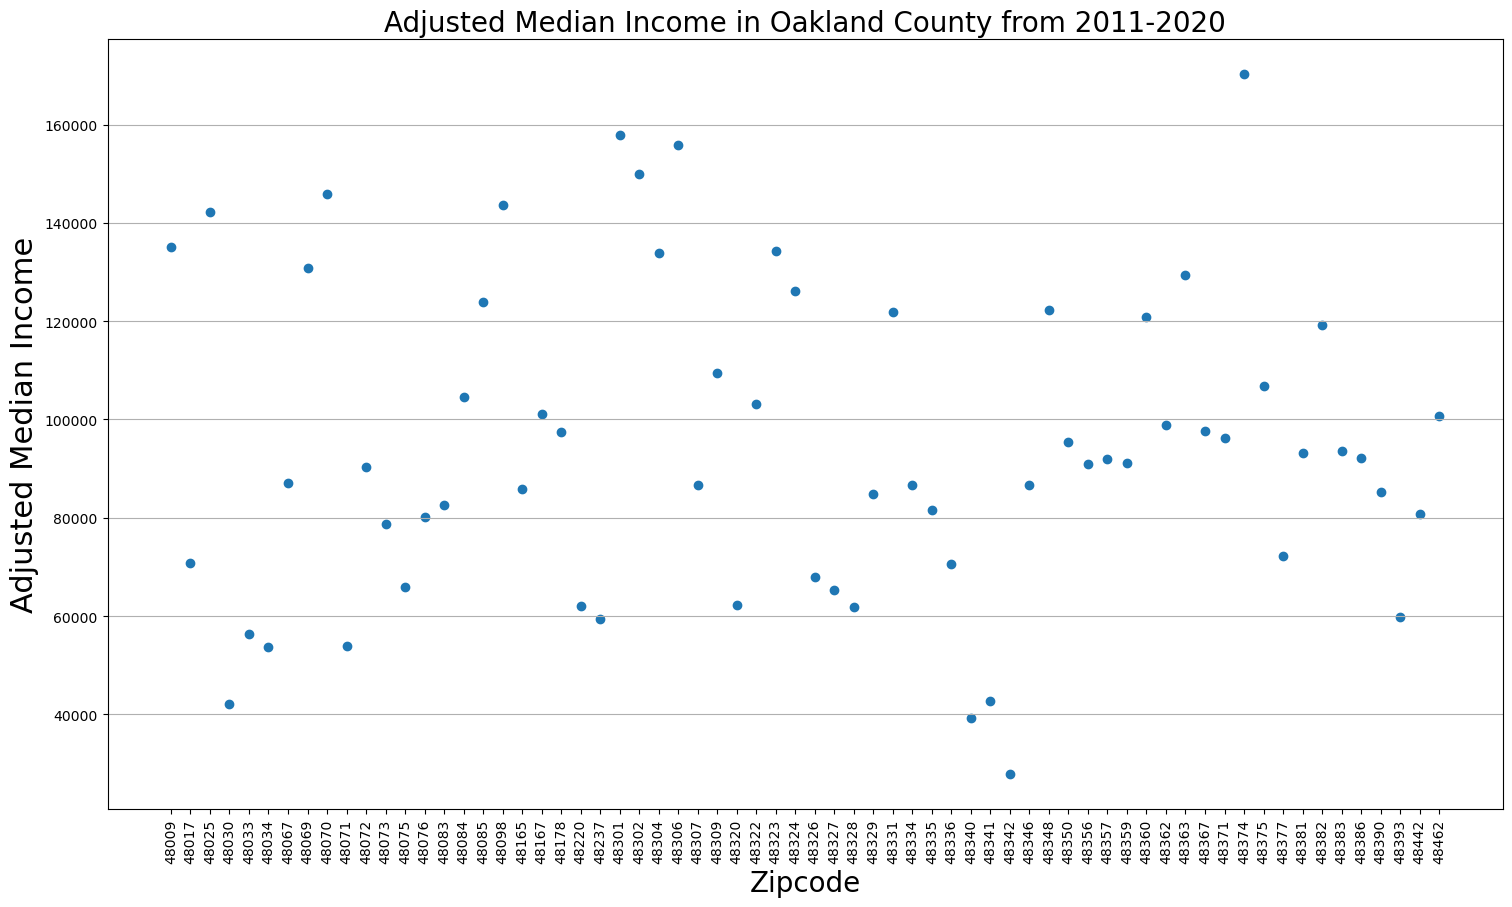

In [44]:
# Create scatter plot(s) for Income in each county
#Oakland
fig = plt.figure(figsize=(18, 10));
xaxis = np.arange(0, len(oakland_grouped.index));
label = oakland_grouped.index.tolist();
plt.scatter(xaxis, oakland_grouped['Adjusted Median Income'],
                    label='');
plt.xticks(ticks=xaxis, labels=label, rotation=90);

plt.xlabel('Zipcode', size = 20);
plt.ylabel('Adjusted Median Income', size = 22);
plt.title('Adjusted Median Income in Oakland County from 2011-2020', size = 20);

plt.grid(axis='y');

plt.show()

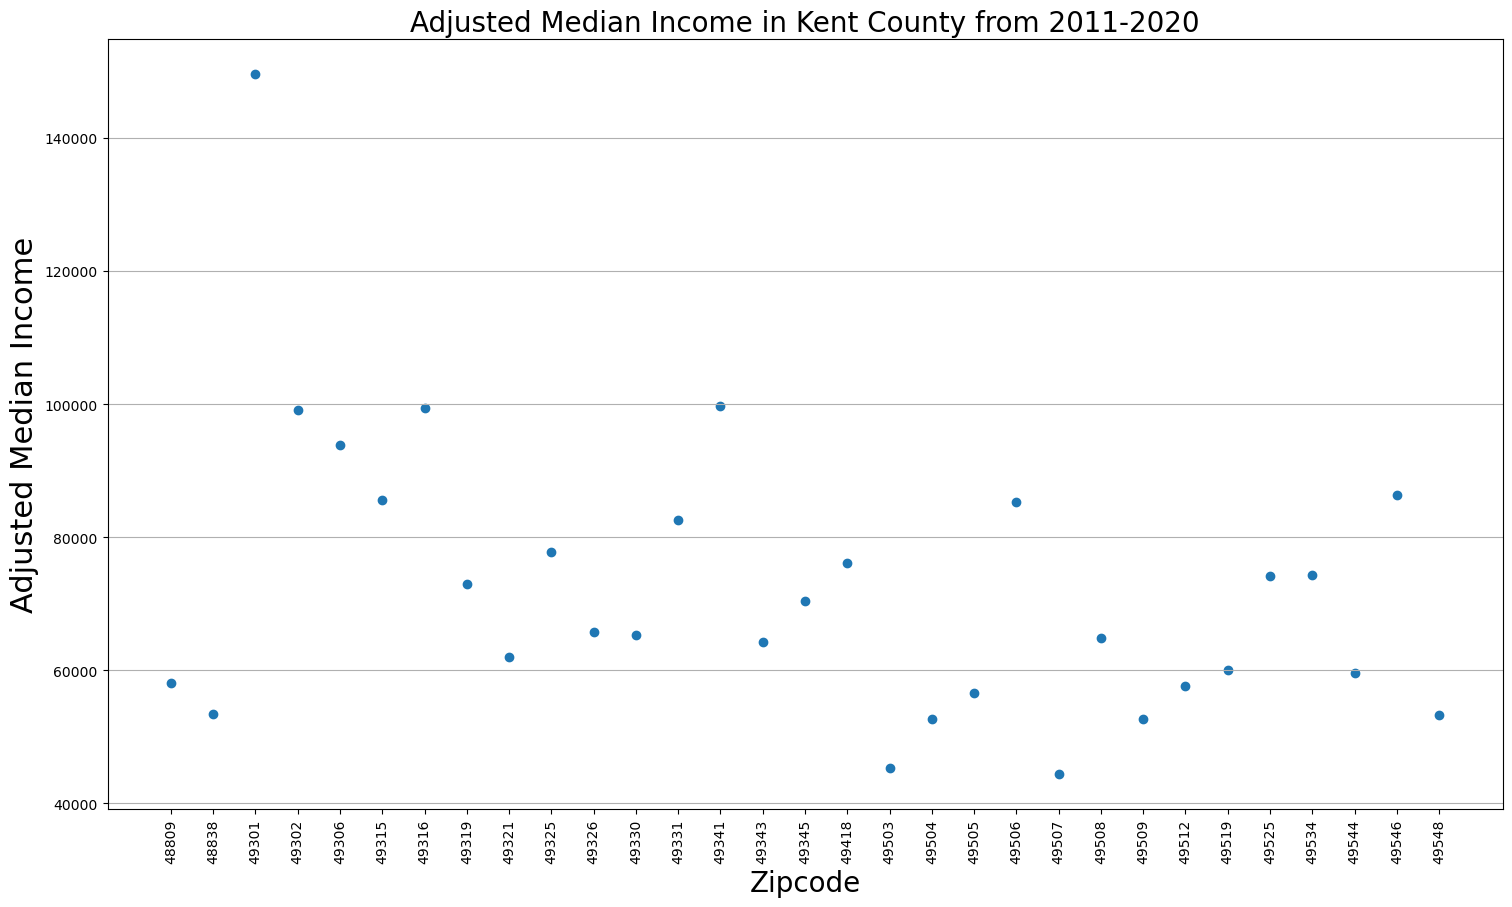

In [45]:
#Kent
fig = plt.figure(figsize=(18, 10));
xaxis = np.arange(0, len(kent_grouped.index));
label = kent_grouped.index.tolist();
plt.scatter(xaxis, kent_grouped['Adjusted Median Income'],
                    label='');
plt.xticks(ticks=xaxis, labels=label, rotation=90);

plt.xlabel('Zipcode', size = 20);
plt.ylabel('Adjusted Median Income', size = 22);
plt.title('Adjusted Median Income in Kent County from 2011-2020', size = 20);

plt.grid(axis='y');

plt.show()

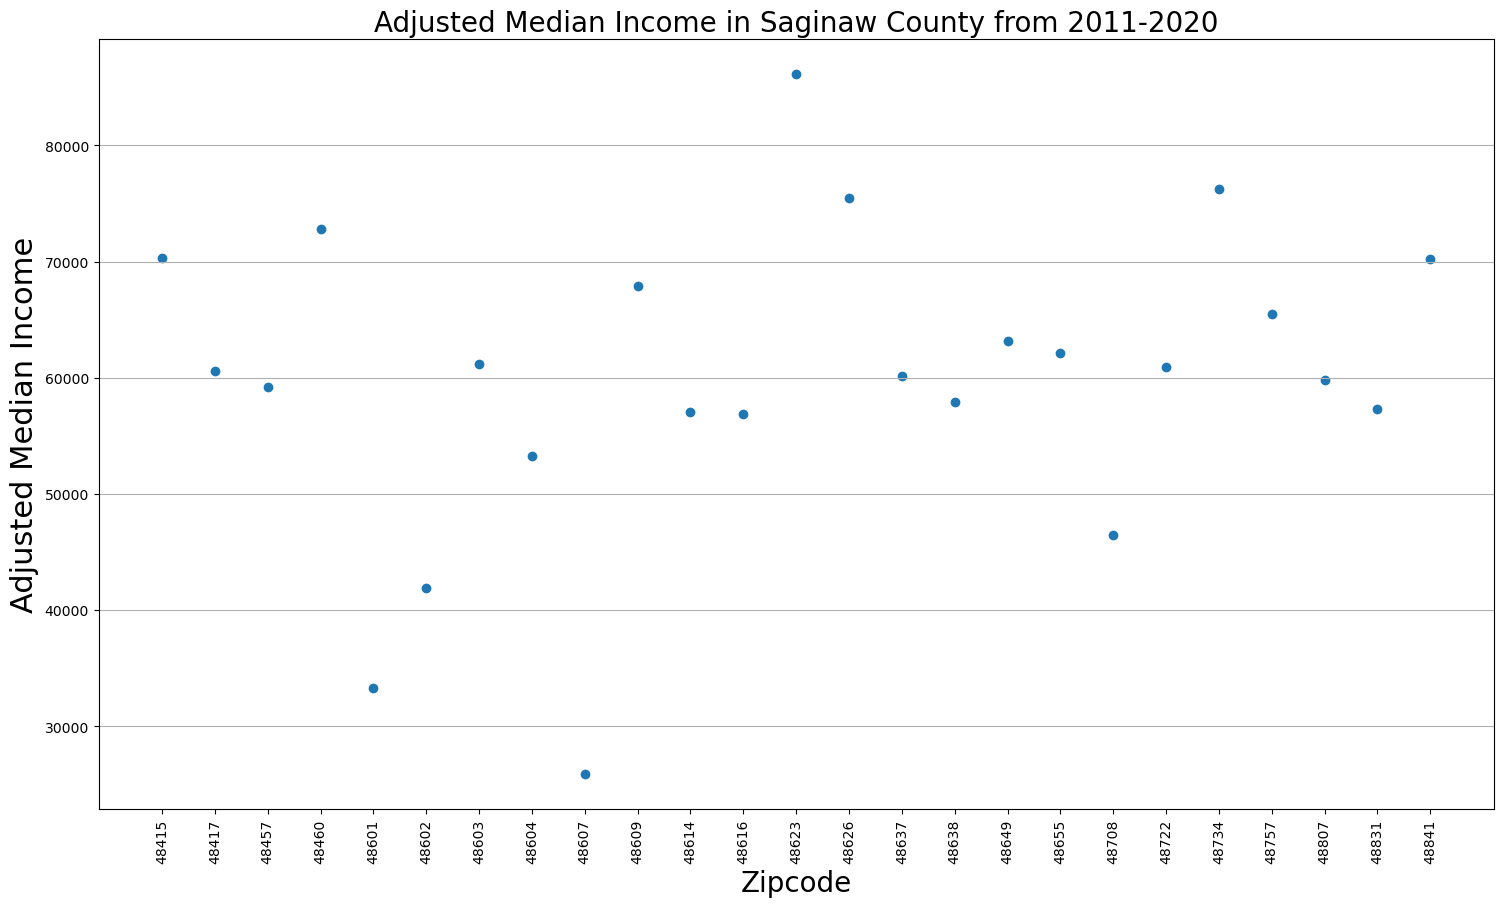

In [46]:
#Saginaw
fig = plt.figure(figsize=(18, 10));
xaxis = np.arange(0, len(saginaw_grouped.index));
label = saginaw_grouped.index.tolist();
plt.scatter(xaxis, saginaw_grouped['Adjusted Median Income'],
                    label='');
plt.xticks(ticks=xaxis, labels=label, rotation=90);

plt.xlabel('Zipcode', size = 20);
plt.ylabel('Adjusted Median Income', size = 22);
plt.title('Adjusted Median Income in Saginaw County from 2011-2020', size = 20);

plt.grid(axis='y');

plt.show()

In [56]:
#Oakland


The r-value is: 0.22075566211544428


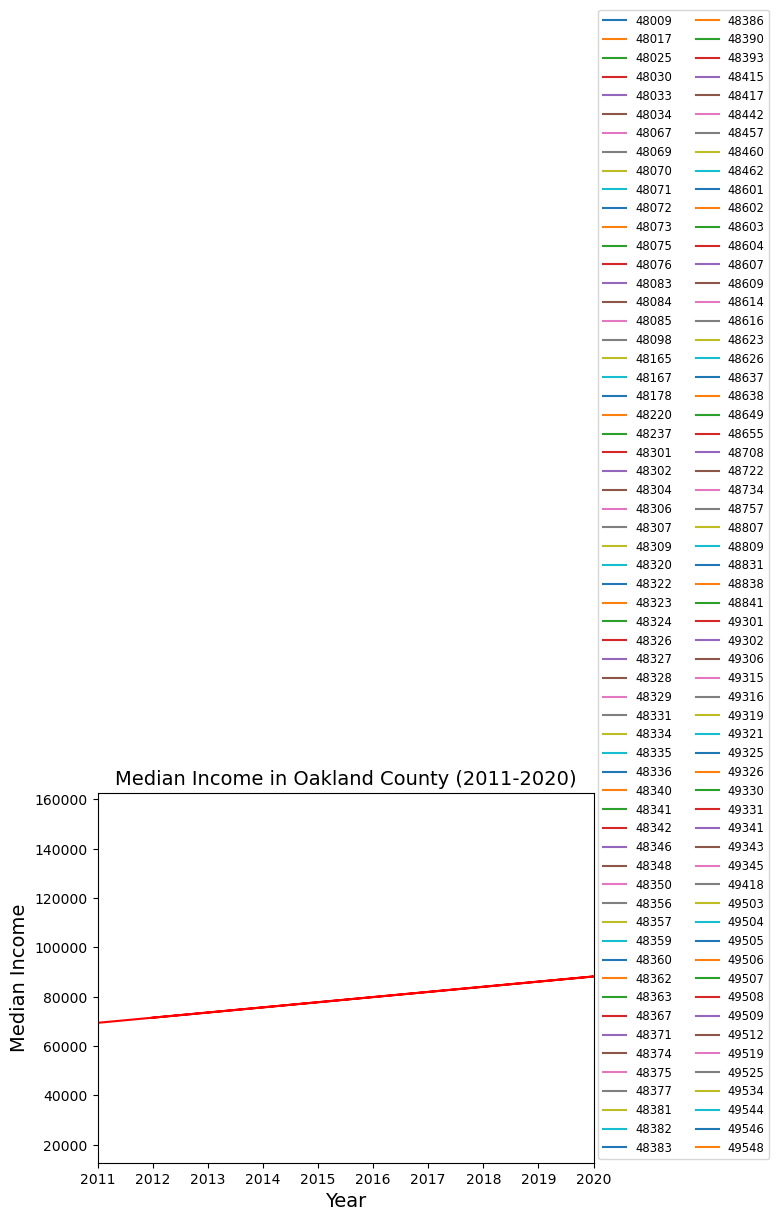

In [67]:
# Calculate the linear regression and correlation for each county's plot
# Add the linear regression line to the graph, if it makes sense (|r| > ?)
oakland_df = census_df.loc[census_df['County'] == 'Oakland']
oakland_data = oakland_df.sort_values('Year', ascending=True)
oakland_df.set_index('Year', inplace=True)
oakland_data.groupby("Zipcode")['Median Income'].plot()
plt.xlabel('Year', size = 14)
plt.xlim(2011, 2020)
plt.ylabel('Median Income', size = 14)
plt.title('Median Income in Oakland County (2011-2020)', size = 14)
plt.legend(loc= (1.01,.01),fontsize='small', ncol= 2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(oakland_df.index, oakland_df['Median Income'])
regress_values = oakland_df.index * slope + intercept
line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept,2))
plt.plot(oakland_df.index, regress_values, 'r-')
plt.annotate(line_eq, (2011, 180000), fontsize=10, color='black')
print(f'The r-value is: {rvalue}')
plt.savefig("output_data/oakland_income_zipcodes_with_regression")

In [58]:
#Kent

The r-value is: 0.2600206989432956


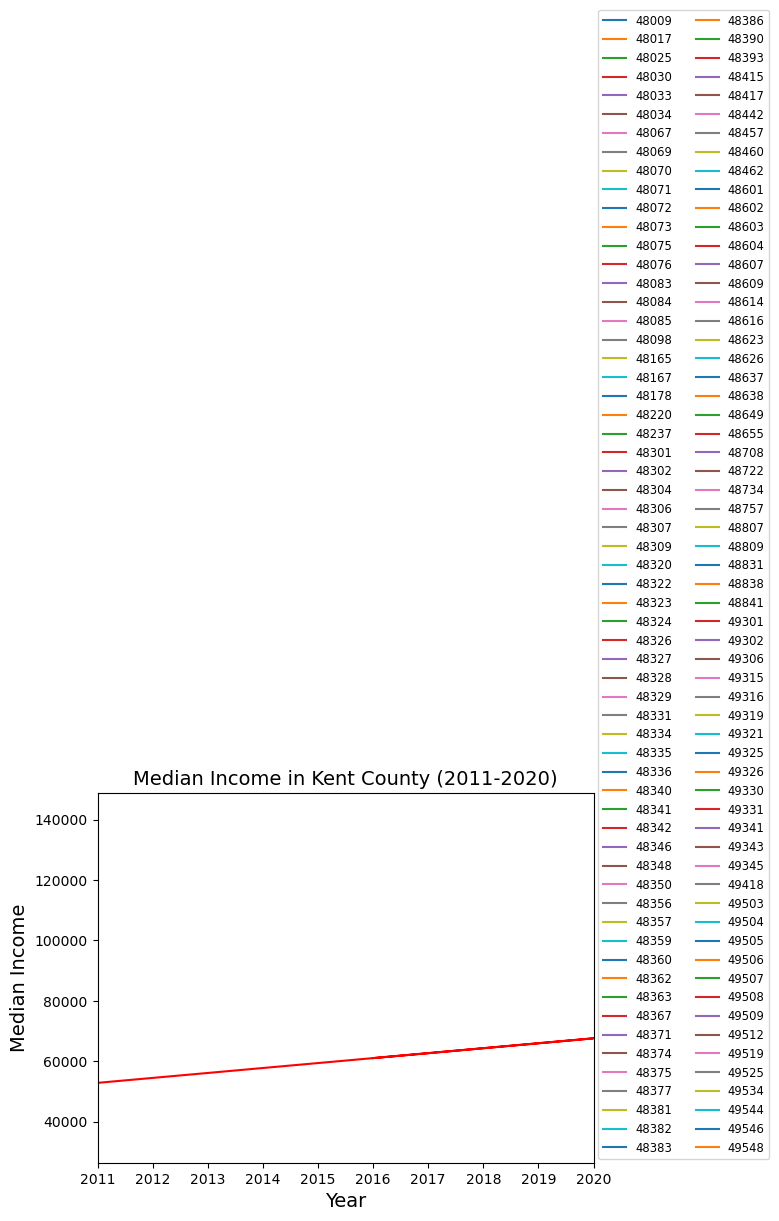

In [68]:
kent_df = census_df.loc[census_df['County'] == 'Kent']
kent_data = kent_df.sort_values('Year', ascending=True)
kent_df.set_index('Year', inplace=True)
kent_data.groupby("Zipcode")['Median Income'].plot()
plt.xlabel('Year', size = 14)
plt.xlim(2011, 2020)
plt.ylabel('Median Income', size = 14)
plt.title('Median Income in Kent County (2011-2020)', size = 14)
plt.legend(loc= (1.01,.01),fontsize='small', ncol= 2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(kent_df.index, kent_df['Median Income'])
regress_values = kent_df.index * slope + intercept
line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept,2))
plt.plot(kent_df.index, regress_values, 'r-')
plt.annotate(line_eq, (2011, 180000), fontsize=10, color='black')
print(f'The r-value is: {rvalue}')
plt.savefig("output_data/kent_income_zipcodes_with_regression")

In [55]:
#Saginaw

The r-value is: 0.2229782210722436


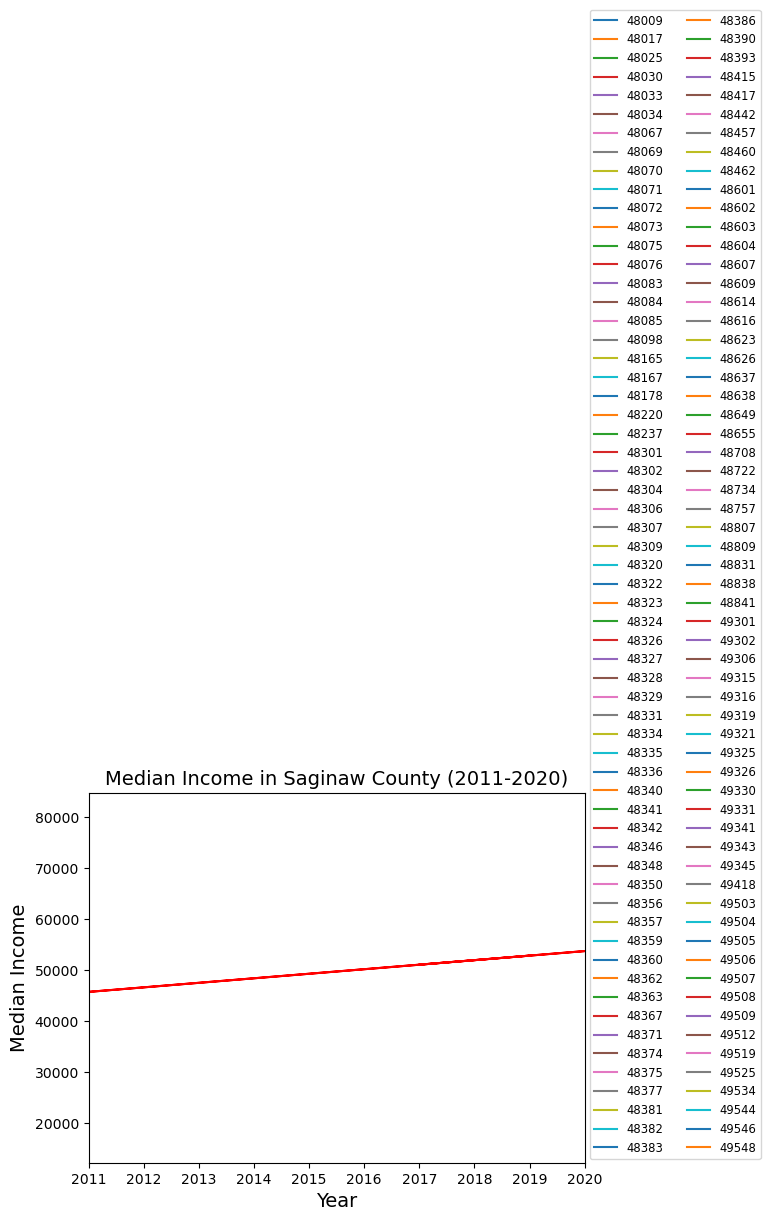

In [69]:
# Calculate the linear regression and correlation for each county's plot
# Add the linear regression line to the graph, if it makes sense (|r| > ?)
saginaw_df = census_df.loc[census_df['County'] == 'Saginaw']
saginaw_data = saginaw_df.sort_values('Year', ascending=True)
saginaw_df.set_index('Year', inplace=True)
saginaw_data.groupby("Zipcode")['Median Income'].plot()
plt.xlabel('Year', size = 14)
plt.xlim(2011, 2020)
plt.ylabel('Median Income', size = 14)
plt.title('Median Income in Saginaw County (2011-2020)', size = 14)
plt.legend(loc= (1.01,.01),fontsize='small', ncol= 2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(saginaw_df.index, saginaw_df['Median Income'])
regress_values = saginaw_df.index * slope + intercept
line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept,2))
plt.plot(saginaw_df.index, regress_values, 'r-')
plt.annotate(line_eq, (2011, 120000), fontsize=10, color='black')
print(f'The r-value is: {rvalue}')
plt.savefig("output_data/saginaw_income_zipcodes_with_regression")

,Year,Oakland Average Income,Kent Average Income,Adjusted Median Income
0,2011,95520.287311,71898.371614,62144.721150
1,2012,92294.531151,70742.774149,60474.096431
2,2013,90977.286570,70398.930345,59534.451743
3,2014,90980.358135,70177.030952,59251.017142
4,2015,93100.007812,70451.747291,58761.649928
5,2016,94421.033078,71709.200703,58696.540350
6,2017,96816.063887,73025.870870,58993.861008
7,2018,98484.404971,74834.896517,60524.867849
8,2019,100628.510768,77149.997333,62196.522276
9,2020,102027.431861,79002.293378,62893.861855


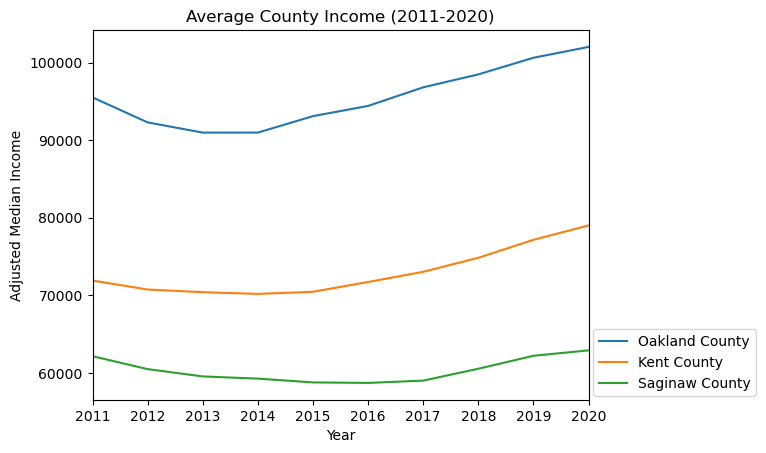

In [72]:
#Export Final Graph 
oakland_county_mean_income = oakland_df.groupby('Year')['Adjusted Median Income'].mean()
kent_county_mean_income = kent_df.groupby('Year')['Adjusted Median Income'].mean()
saginaw_county_mean_income = saginaw_df.groupby('Year')['Adjusted Median Income'].mean()

plt.plot(oakland_county_mean_income, label="Oakland County")
plt.plot(kent_county_mean_income, label="Kent County")
plt.plot(saginaw_county_mean_income, label="Saginaw County")

plt.legend(loc=(1.01,0.01))
plt.xlabel('Year')
plt.ylabel('Adjusted Median Income')
plt.title('Average County Income (2011-2020)')
plt.xlim(2011,2020)

oakland_county_mean_income = pd.DataFrame(oakland_county_mean_income).reset_index()
kent_county_mean_income = pd.DataFrame(kent_county_mean_income).reset_index()
saginaw_county_mean_income = pd.DataFrame(saginaw_county_mean_income).reset_index()

county_income = pd.merge(oakland_county_mean_income, kent_county_mean_income, how='outer', on='Year')
county_income = pd.merge(county_income, saginaw_county_mean_income, how='outer', on='Year')
county_income.rename(columns={'Adjusted Median Income_x': 'Oakland Average Income', 'Adjusted Median Income_y':'Kent Average Income', 'Adjusted Median Income_z':'Saginaw Average Income'}) 

# Home Values in Each County, by Zipcode **Tamica**

In [ ]:
# Create scatter plot(s) for Home Values in each county


In [ ]:
# Calculate the linear regression and correlation for each county's plot


In [ ]:
# Add the linear regression line to the graph, if it makes sense (|r| > ?)


In [ ]:
# Export final graph


# Rent Prices in Each County, by Zipcode **Stephanie**

In [ ]:
# Create scatter plot(s) for Rent Prices in each county


In [ ]:
# Calculate the linear regression and correlation for each county's plot


In [ ]:
# Add the linear regression line to the graph, if it makes sense (|r| > ?)


In [ ]:
# Export final graph


# Demographic Composition in Each County, by Zipcode **Rhi**

In [ ]:
# Create scatter plot(s) for total population in each county 
# also need to do graphs for demographic composition, employment rate, poverty rate
# Need to create more filters by year and by zip code within counties


In [ ]:
# Calculate the linear regression and correlation for each county's plot


In [ ]:
# Add the linear regression line to the graph, if it makes sense (|r| > ?)


In [ ]:
# Export final graph


# Combination Visualizations

# GIF Maps

In [ ]:
# Relocate needed module and import it (install as well)

In [ ]:
# Determine what specific visualizations to convert to map GIFs

In [ ]:
# Create maps by county, showing individual points per zipcode (heat map)

In [ ]:
# Export maps?